# Problem Set 1
### Heather Chen
### 1. 1D kernel density estimator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid = pd.read_csv('data/COVIDincubation.txt')
covid.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


#### (a)

Text(0, 0.5, 'Percent of observations in bin')

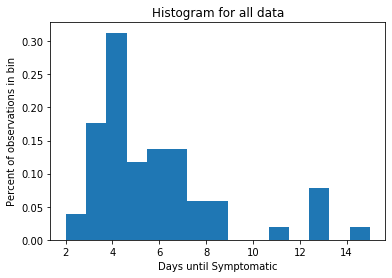

In [6]:
num_bins = 15
plt.hist(covid['symp_days'].values, num_bins, range=(2,15), density=True)
plt.title('Histogram for all data')
plt.xlabel('Days until Symptomatic')
plt.ylabel('Percent of observations in bin')

Text(0, 0.5, 'Percent of observations in bin')

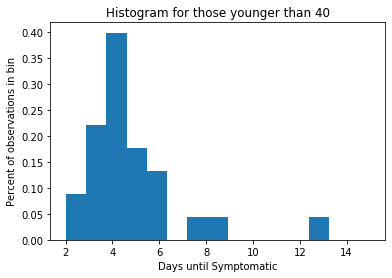

In [12]:
num_bins = 15
covidl40 = covid.loc[covid['age']<=40]
plt.hist(covidl40['symp_days'].values, num_bins, range=(2,15), density=True)
plt.title('Histogram for those younger than 40')
plt.xlabel('Days until Symptomatic')
plt.ylabel('Percent of observations in bin')

Text(0, 0.5, 'Percent of observations in bin')

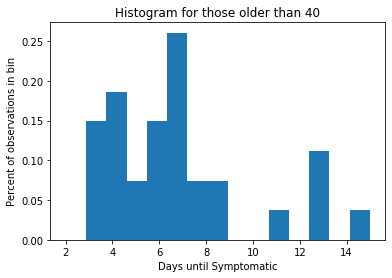

In [14]:
num_bins = 15
covido40 = covid.loc[covid['age']>40]
plt.hist(covido40['symp_days'].values, num_bins, range=(2,15), density=True)
plt.title('Histogram for those older than 40')
plt.xlabel('Days until Symptomatic')
plt.ylabel('Percent of observations in bin')

#### (b)

In [16]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

#Now consider the first histogram that includes all data.
x = covid['symp_days'].values
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv=LeaveOneOut())
grid.fit(x[:, None]);

In [17]:
#The optimal bandwidths for all data is:
grid.best_params_

{'bandwidth': 0.8910453324821516}

Text(0.5, 1.0, 'Kernel Density Estimation for all age groups')

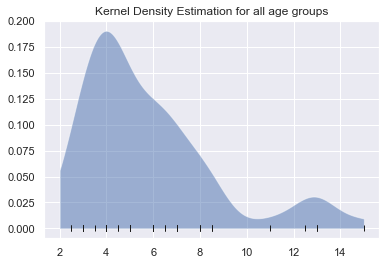

In [23]:
import seaborn as sns; sns.set()

opt_bandwidth = grid.best_params_['bandwidth']
kde = KernelDensity(bandwidth=opt_bandwidth, kernel='gaussian')
kde.fit(x[:, None])

x_d = np.linspace(2, 15, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, 0), '|k', markeredgewidth=1)
plt.title('Kernel Density Estimation for all age groups')

In [24]:
#Now consider the second histogram that includes those age below 40.
x = covidl40['symp_days'].values
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv=LeaveOneOut())
grid.fit(x[:, None]);

In [25]:
#The optimal bandwidths for the younger subsample is:
grid.best_params_

{'bandwidth': 1.6233824316122782}

Text(0.5, 1.0, 'Kernel Density Estimation for younger people (age <= 40)')

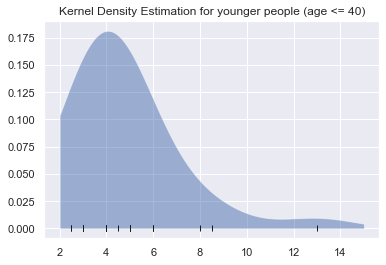

In [26]:
opt_bandwidth = grid.best_params_['bandwidth']
kde = KernelDensity(bandwidth=opt_bandwidth, kernel='gaussian')
kde.fit(x[:, None])

x_d = np.linspace(2, 15, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, 0), '|k', markeredgewidth=1)
plt.title('Kernel Density Estimation for younger people (age <= 40)')

In [27]:
#Now consider the third histogram that includes those age above 40.
x = covido40['symp_days'].values
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv=LeaveOneOut())
grid.fit(x[:, None]);

In [28]:
#The optimal bandwidths for the older subsample is:
grid.best_params_

{'bandwidth': 1.1861737164524786}

Text(0.5, 1.0, 'Kernel Density Estimation for older people (age > 40)')

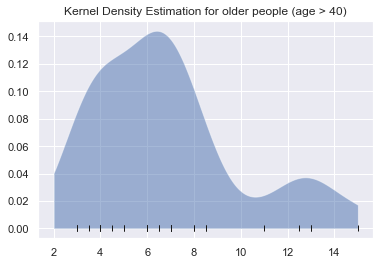

In [30]:
opt_bandwidth = grid.best_params_['bandwidth']
kde = KernelDensity(bandwidth=opt_bandwidth, kernel='gaussian')
kde.fit(x[:, None])

x_d = np.linspace(2, 15, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, 0), '|k', markeredgewidth=1)
plt.title('Kernel Density Estimation for older people (age > 40)')

#### (c)
The COVID-19 incubation period is generally longer for elder people (those who age 40 and beyond) than for younger people. The peak of incubation period for younger people is about 4 days, while the peak for older people is about 6-7 days. Also, for those aged 40-years-old and older, the incubation period might be longer than 10 days. In contrast, the probability is relatively low for younger people.

### 2. 2D kernal density estimator
#### (a)

In [33]:
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

In [37]:
print('Shape of bq_data', bq_data.shape)
print('Bequest distribution by income group:',
      bq_data.sum(axis=0).round(4))
print('Sum of all probabilities', bq_data.sum())

Shape of bq_data (73, 7)
Bequest distribution by income group: [0.0121 0.0082 0.0159 0.014  0.0138 0.0693 0.8667]
Sum of all probabilities 1.0000000000000002


Text(0.5, 0, 'Percent of BQ received')

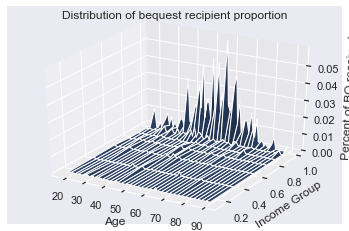

In [43]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

age_vec = np.arange(18,91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

#### (b)

In [45]:
from scipy.stats import gaussian_kde

age_bq = pd.read_csv('data/BQ_ind_data.txt')
age_bq.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


Text(0.5, 0, 'Percent of BQ received')

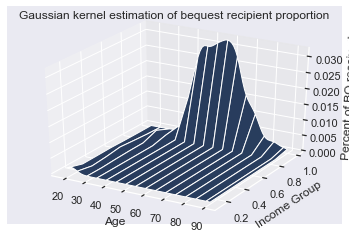

In [53]:
#kernel density estimation
age_mat = age_bq['age']
income_mat = age_bq['income_pctl']
bandwidth = 0.25
kernel = gaussian_kde(age_bq.T, bw_method=bandwidth)

age_mat_min = age_mat.min()
age_mat_max = age_mat.max()
income_mat_min = income_mat.min()
income_mat_max = income_mat.max()

age_mat_i, income_mat_i = np.mgrid[age_mat_min:age_mat_max:73j,
                              income_mat_min:income_mat_max:7j]
coords = np.vstack([item.ravel() for item in [age_mat_i, income_mat_i]])

# kernel(coords)

Z = np.reshape(kernel(coords), age_mat_i.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat_i, income_mat_i, Z_scaled, rstride=5)
ax.set_title('Gaussian kernel estimation of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

I think the bandwidth parameter is the best at 0.25, as it smoothes the angles at the peak comparing with setting it equal to 0.2 or even smaller. Also, if we assign a larger value, like 0.3, it tends to overfit the data by neglecting strong features. Therefore 0.25 seems to be the optimal one.

In [54]:
#The estimated density for those aged 61 in the 6th income category
Z_scaled[61-13+1][5]

7.912803118599589e-08